<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

#  9.2: CNN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- A guide you are encouraged to read through is TensorFlow's own tutorial for image classification, which can be found [here](https://www.tensorflow.org/tutorials/images/cnn)

## CIFAR10 small image classification
- [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset of color training images, labeled over 10 categories.

It has the classes:
- airplane
- automobile
- bird
- cat
- deer
- dog
- frog
- horse
- ship
- truck

## Import libraries

In [1]:
# Uncomment the statements below if there are problems with TensorFlow on macOS
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [5]:
import tensorflow
from tensorflow import keras
from keras.datasets import cifar10
from keras.layers import Conv2D
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import MaxPool2D
from keras.models import Sequential
from keras.utils import to_categorical


In [ ]:
# insert code here


In [7]:
# Uncomment the statement below to allow online monitoring with TensorBoard (need to be installed)
from keras.callbacks import TensorBoard

## Load data
Use the **Keras**' load method.

In [11]:
# insert code here
(X_train_all, t_train_all), (X_test_all, t_test_all)= cifar10.load_data()

## Check some data

In [13]:
# insert code here
X_train_all.shape

(50000, 32, 32, 3)

In [15]:
t_train_all.flatten().shape

(50000,)

In [27]:
size = 500
X_train = X_train_all[:size,:,:,:]
t_train = t_train_all[0:size,:]
X_test = X_test_all[0:size,:,:,:]
t_test = t_test_all[0:size,:]

## Prepare data

In [28]:
classes = (
    'plane',
    'car',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck')

In [29]:
def check_one(data, label, id = None, actual = None, compare = False):
    # check one
    if id is None:
        id = np.random.randint(data.shape[0])
    im = data[id]
    plt.figure(figsize = (3, 3))
    plt.imshow(im)
    l_id = label[id]
    if (compare) and (actual is not None) and (l_id != np.argmax(actual[id])):
        a_id = np.argmax(actual[id])
        plt.title('Class %d (%s) [\u2260 %d-%s]' % (l_id, classes[l_id], a_id, classes[a_id]))
    else:
        plt.title('Class %d (%s)' % (l_id, classes[l_id]))
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [30]:
# insert code here
def check_ten(data, label, actual = None, compare = False):
    # check ten
    fig, ax = plt.subplots(2, 5, figsize = (11, 5))
    fig.subplots_adjust(left = 0.02, right = 0.98, top = 0.8, wspace = 0.2, hspace = 0.2)
    fig.suptitle('Check Data', fontsize = 12, fontweight = 'bold')
    plt.rcParams.update({'font.size': 10})
    ids = np.random.randint(data.shape[0], size = 10)
    r = 0
    c = 0
    for id in ids:
        im = data[id]
        # original image
        ax[r, c].imshow(im)
        l_id = label[id]
        if (compare) and (actual is not None) and (l_id != np.argmax(actual[id])):
            a_id = np.argmax(actual[id])
            ax[r, c].set_title('Class %d (%s) [\u2260 %d-%s]' % (l_id, classes[l_id], a_id, classes[a_id]))
        else:
            ax[r, c].set_title('Class %d (%s)' % (l_id, classes[l_id]))
        ax[r, c].set_xticks([])
        ax[r, c].set_yticks([])
        c += 1
        if c > 4:
            r += 1
            c = 0
    plt.show()

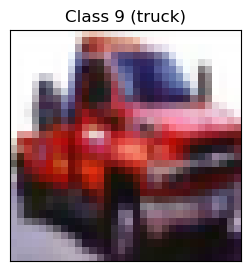

In [31]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
check_one(X_train_all,t_train_all.flatten())

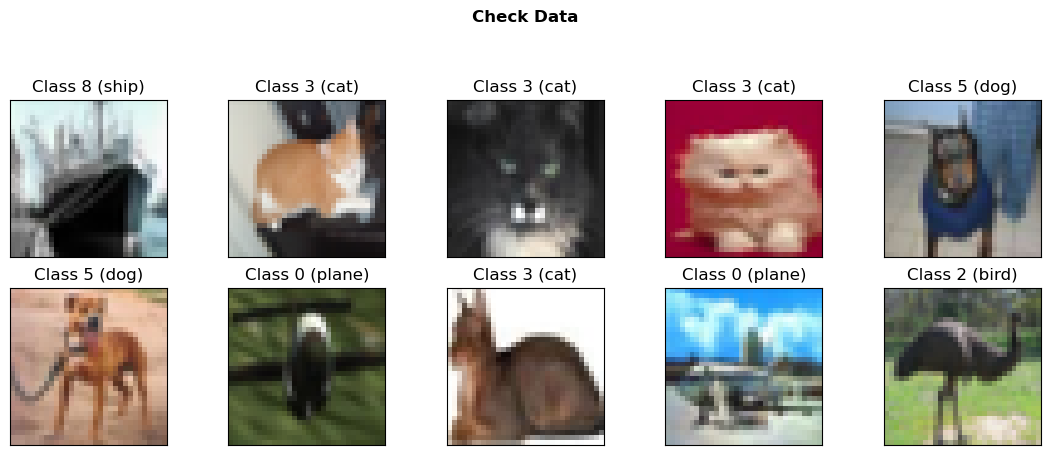

In [32]:
check_ten(X_train_all,t_train_all.flatten())

In [33]:
_, img_rows, img_cols, img_channels = X_train_all.shape

In [34]:
num_classes = len(set(t_train_all.flatten()))

## Create the model's architecture
- **NOTE ALERT**: Take into account the volume of data and parameters. Time and processing escalate quite fast.
- **NOTE ALERT**: It is likely this data will require more complex models.

In [35]:
# insert code here
# Convert the target to categorical so it is treated is classification
y_train = to_categorical(
    t_train,
    num_classes = num_classes,
    dtype = 'uint8')
y_test = to_categorical(
    t_test,
    num_classes = num_classes,
    dtype = 'uint8')

In [36]:
model=Sequential()

In [38]:
model.add(Conv2D(48, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = (32,32,3)))
model.add(Conv2D(48, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation = 'softmax'))

In [39]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 48)        1344      
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 48)        20784     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 48)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 48)        0         
                                                                 
 flatten (Flatten)           (None, 10800)             0         
                                                                 
 dense (Dense)               (None, 512)               5530112   
                                                        

## Compile the model

In [40]:
# insert code here
model.compile(optimizer='adam',
             loss ='categorical_crossentropy',
             metrics = ['accuracy'])

## Fit the training data

In [41]:
# Uncomment the statement below to allow online monitoring with TensorBoard
tensorboard = TensorBoard(log_dir = 'logs') # choose or create a directory for the logs

In [46]:
%%time
# insert code here
history = model.fit(
    X_train,
    y_train,
    validation_split = 0.2,
    epochs = 100,
    batch_size = 100,
    verbose = 0)
print(f'Training accuracy:{history.history["accuracy"][-1]:.2f} validation accuracy:{history.history["val_accuracy"][-1]:.2f} ')

# cdgddgcvdgeygdcvdgyegdcvgdeygdcvdgeydgcvdgeygdcvdgeydgcvgdyedgcv
# ..., callbacks = [tensorboard], ...

Training accuracy:0.99 validation accuracy:0.37 
CPU times: total: 8min 49s
Wall time: 2min 35s


### TensorBoard
- TensorBoard is TensorFlow's visualisation toolkit. 
- If Tensorflow 2 and Jupyter is installed in the same environment, running the cell below will start TensorBoard within the notebook.
- More information about how to set up TensorBoard can be found [here](https://www.tensorflow.org/tensorboard/tensorboard_in_notebooks)


In [47]:
%load_ext tensorboard
%tensorboard --logdir logs

## Create predictions

In [48]:
%%time
predictions = np.argmax(model.predict(X_test), axis=1)

16/16 [==============================] - 1s 34ms/step
CPU times: total: 2.22 s
Wall time: 1.24 s


## Evaluate the model

In [49]:
# insert code here
score= model.evaluate(X_test, y_test, batch_size = 10)
print('\nTest loss: %.6f, Test accuracy: %.6f' % tuple(score))

50/50 [==============================] - 1s 17ms/step - loss: 5.7403 - accuracy: 0.2480

Test loss: 5.740260, Test accuracy: 0.248000


## Visualisation of cost

In [50]:
# insert code here
history.history

{'loss': [134.56105041503906,
  37.428138732910156,
  6.5673298835754395,
  2.8771822452545166,
  2.2492880821228027,
  2.1764485836029053,
  2.145469903945923,
  2.10776424407959,
  2.1023335456848145,
  1.9663872718811035,
  1.9145092964172363,
  1.79280686378479,
  1.6988438367843628,
  1.6093955039978027,
  1.5409269332885742,
  1.4221222400665283,
  1.4245991706848145,
  1.2964205741882324,
  1.1711995601654053,
  1.1121309995651245,
  0.9665048718452454,
  0.9345956444740295,
  0.9165387153625488,
  0.7911440134048462,
  0.8095877170562744,
  0.7092623114585876,
  0.6852834820747375,
  0.6136573553085327,
  0.6438753604888916,
  0.5423170328140259,
  0.6745558977127075,
  0.43324288725852966,
  0.4081093668937683,
  0.4637923538684845,
  0.3998909890651703,
  0.3883206248283386,
  0.5059778690338135,
  0.4645823538303375,
  0.30523788928985596,
  0.32060298323631287,
  0.30023184418678284,
  0.3037492632865906,
  0.32767200469970703,
  0.26170557737350464,
  0.2062845677137375,
 

## Results

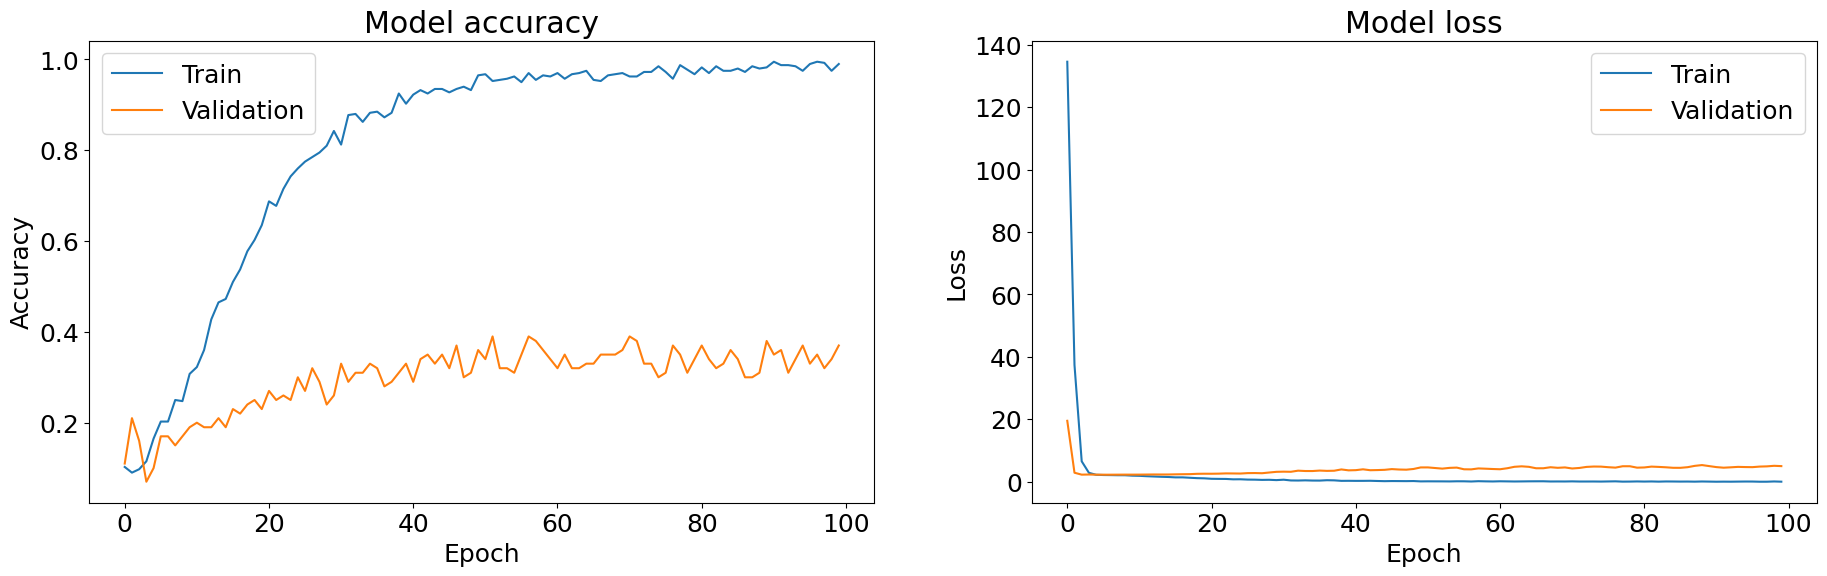

In [53]:
# insert code here
# drop model. from the demo
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)
plt.rcParams.update({'font.size': 18})
# Plot training & validation accuracy values
ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Model accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'])
# Plot training & validation loss values
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'])
plt.show()

In [ ]:
check_ten(X_test, predictions, y_test)



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



